# Como realizar el proyecto final

1. Paso
Importar librerias

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#import seaborn as sns



2) Cargar Dataset

In [2]:
df = pd.read_csv('../../data/reviews.csv')
df

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
1,productivity,155,1547,204.0,-0.50,72,2.07
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80
...,...,...,...,...,...,...,...
495,games,1213,2205,318.0,0.00,69,2.08
496,art,4,1826,163.0,1.04,85,3.19
497,games,453,823,196.0,0.35,73,1.87
498,productivity,116,1161,347.0,0.49,93,2.64


3) Exploracion inicial de datos

In [3]:
df.head(10)

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
1,productivity,155,1547,204.0,-0.50,72,2.07
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80
5,games,68,676,331.0,2.39,88,2.67
6,art,1225,2227,269.0,0.00,82,2.94
7,art,858,1752,253.0,0.05,99,3.51
8,games,1281,2329,172.0,0.00,83,3.29
9,games,815,1482,169.0,0.73,99,3.46


In [4]:
#Vemos que hay valores nulos asi que haremos lo siguiente:
df.isnull().sum()

Category                   0
No Of Reviews              0
No Of Installs             0
Size                      28
Price                      0
Days since Last Update     0
Rating                     0
dtype: int64

array([[<Axes: title={'center': 'No Of Reviews'}>,
        <Axes: title={'center': 'No Of Installs'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Days since Last Update'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

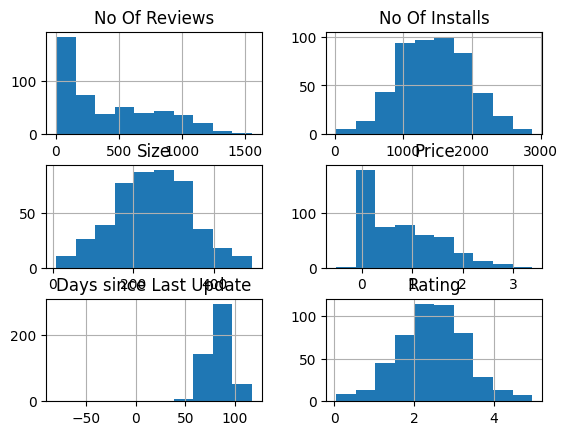

In [5]:
df.hist()

In [6]:
df.describe()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
count,500.000000,500.00000,472.000000,500.000000,500.000000,500.000000
mean,426.578000,1456.22200,247.870763,0.772200,83.274000,2.462260
std,366.600332,506.51664,95.105050,0.752114,14.960433,0.840859
min,0.000000,23.00000,8.000000,-0.500000,-80.000000,0.050000
25%,113.750000,1072.50000,184.000000,0.000000,76.000000,1.907500
50%,273.000000,1447.50000,249.000000,0.645000,84.000000,2.480000
75%,716.250000,1783.75000,312.250000,1.270000,92.000000,3.020000
max,1552.000000,2880.00000,494.000000,3.380000,117.000000,4.970000


4) Preprocesamiento de datos

In [7]:
df[df['Price'] < 0]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
1,productivity,155,1547,204.0,-0.5,72,2.07


In [8]:
df[df['Days since Last Update'] < 0]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
11,productivity,201,2006,NaN,0.00,-68,1.91
88,games,59,587,335.0,1.58,-80,2.08


In [9]:
#Aqui vamos a quitar los numeros negativos 
df = df[(df['Price'] >= 0)& (df['Days since Last Update'] >= 0)]
df

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80
5,games,68,676,331.0,2.39,88,2.67
...,...,...,...,...,...,...,...
495,games,1213,2205,318.0,0.00,69,2.08
496,art,4,1826,163.0,1.04,85,3.19
497,games,453,823,196.0,0.35,73,1.87
498,productivity,116,1161,347.0,0.49,93,2.64


In [10]:
imp = SimpleImputer(strategy='mean')
df[["Size"]] = imp.fit_transform(df[["Size"]])

/var/folders/9c/0nd6phzx429bzy7lvvwctvdm0000gn/T/ipykernel_52070/1755256490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Size"]] = imp.fit_transform(df[["Size"]])


In [11]:
df

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.000000,0.00,81,1.94
2,books,273,1162,271.000000,0.81,69,1.34
3,games,110,1104,247.778723,0.00,82,1.48
4,games,261,1403,224.000000,1.01,98,2.80
5,games,68,676,331.000000,2.39,88,2.67
...,...,...,...,...,...,...,...
495,games,1213,2205,318.000000,0.00,69,2.08
496,art,4,1826,163.000000,1.04,85,3.19
497,games,453,823,196.000000,0.35,73,1.87
498,productivity,116,1161,347.000000,0.49,93,2.64


In [12]:
df.isnull().sum()

Category                  0
No Of Reviews             0
No Of Installs            0
Size                      0
Price                     0
Days since Last Update    0
Rating                    0
dtype: int64

In [13]:
ohe = OneHotEncoder(dtype= int, sparse_output= False, drop='first')
codificado = ohe.fit_transform(df[['Category']])

In [14]:
codificado

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [15]:
df2 = pd.DataFrame(codificado,columns = ohe.get_feature_names_out(), index=df.index )

In [16]:
df2

,Category_books,Category_business,Category_games,Category_productivity
0,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
...,...,...,...,...
495,0,0,1,0
496,0,0,0,0
497,0,0,1,0
498,0,0,0,1


In [17]:
df = pd.concat((df,df2), axis=1)
df

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating,Category_books,Category_business,Category_games,Category_productivity
0,games,510,1437,318.000000,0.00,81,1.94,0,0,1,0
2,books,273,1162,271.000000,0.81,69,1.34,1,0,0,0
3,games,110,1104,247.778723,0.00,82,1.48,0,0,1,0
4,games,261,1403,224.000000,1.01,98,2.80,0,0,1,0
5,games,68,676,331.000000,2.39,88,2.67,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,games,1213,2205,318.000000,0.00,69,2.08,0,0,1,0
496,art,4,1826,163.000000,1.04,85,3.19,0,0,0,0
497,games,453,823,196.000000,0.35,73,1.87,0,0,1,0
498,productivity,116,1161,347.000000,0.49,93,2.64,0,0,0,1


In [18]:
df.drop('Category', axis=1)


,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating,Category_books,Category_business,Category_games,Category_productivity
0,510,1437,318.000000,0.00,81,1.94,0,0,1,0
2,273,1162,271.000000,0.81,69,1.34,1,0,0,0
3,110,1104,247.778723,0.00,82,1.48,0,0,1,0
4,261,1403,224.000000,1.01,98,2.80,0,0,1,0
5,68,676,331.000000,2.39,88,2.67,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
495,1213,2205,318.000000,0.00,69,2.08,0,0,1,0
496,4,1826,163.000000,1.04,85,3.19,0,0,0,0
497,453,823,196.000000,0.35,73,1.87,0,0,1,0
498,116,1161,347.000000,0.49,93,2.64,0,0,0,1


In [19]:
#df.corr

In [20]:
#plt.figure(figsize= (10,4))
#sns.heatmap(df.corr(),cmap= 'coolwarm', annot= True)


In [21]:
# se divide el 20% para pruebas y 80% para entrenamiento

5. Seleccionar las variables dependientes(variable objetivo o target) e independientes(features)

In [22]:
x = df.drop(['Rating', 'Category'], axis=1)
x

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Category_books,Category_business,Category_games,Category_productivity
0,510,1437,318.000000,0.00,81,0,0,1,0
2,273,1162,271.000000,0.81,69,1,0,0,0
3,110,1104,247.778723,0.00,82,0,0,1,0
4,261,1403,224.000000,1.01,98,0,0,1,0
5,68,676,331.000000,2.39,88,0,0,1,0
...,...,...,...,...,...,...,...,...,...
495,1213,2205,318.000000,0.00,69,0,0,1,0
496,4,1826,163.000000,1.04,85,0,0,0,0
497,453,823,196.000000,0.35,73,0,0,1,0
498,116,1161,347.000000,0.49,93,0,0,0,1


In [23]:
y = df['Rating']

6) Dividir el porcentaje en 80% entrenamiento y 20% testing

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,shuffle= True,random_state=42 )

In [25]:
x_train 

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Category_books,Category_business,Category_games,Category_productivity
58,177,1771,184.0,0.00,84,0,0,1,0
230,581,1057,239.0,1.98,89,0,0,0,0
283,296,1986,275.0,0.11,71,0,0,1,0
487,571,1949,371.0,0.21,90,0,0,0,1
223,8,83,79.0,0.04,108,0,1,0,0
...,...,...,...,...,...,...,...,...,...
109,1067,1940,249.0,0.89,80,0,0,1,0
273,764,1389,78.0,1.27,81,0,0,0,0
351,396,792,121.0,2.36,54,0,0,0,0
438,411,1346,281.0,0.00,66,0,0,1,0


In [26]:
y_train

58     2.30
230    2.88
283    2.46
487    3.34
223    2.04
       ... 
109    2.50
273    2.29
351    1.05
438    0.72
105    2.57
Name: Rating, Length: 397, dtype: float64

In [27]:
x_test

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Category_books,Category_business,Category_games,Category_productivity
486,457,1381,191.0,0.10,69,0,0,1,0
75,424,771,249.0,0.05,87,0,0,0,1
234,533,1786,371.0,0.27,92,0,0,0,0
178,777,2024,414.0,1.20,88,0,0,0,0
240,499,908,323.0,1.76,65,0,0,0,1
...,...,...,...,...,...,...,...,...,...
250,70,1690,218.0,1.05,79,0,0,1,0
386,183,1832,237.0,1.05,72,0,0,0,0
21,0,1687,225.0,0.00,97,0,0,0,0
324,595,1081,114.0,0.84,91,0,0,1,0


In [28]:
y_test

486    1.95
75     2.13
234    3.30
178    3.76
240    1.38
       ... 
250    2.83
386    2.74
21     2.78
324    3.08
334    2.44
Name: Rating, Length: 100, dtype: float64

7) Opcional -> Escalamiento

In [29]:
#Se utiliza el standar scaler

8) Seleccionar el modelo y entrenarlo

In [30]:
modelo = LinearRegression()

In [31]:
modelo.fit(x_train,y_train)

LinearRegression()

9) Hacer Predicciones

In [32]:
app_movil = [
    200,#No of reviews
    2000,#No of installs
    200,# Size
    1.5,#Price
    110,#Days since last update
    1,#category_books
    0,
    0,
    0
]

In [33]:
prediccion = modelo.predict([app_movil])

/Users/memopispo/Documents/NumpyPandas/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
prediccion

array([4.82587333])

In [35]:
prediccion_con_testing = modelo.predict(x_test)

In [36]:
prediccion_con_testing.reshape(100,1)

array([[1.30228216],
       [1.77850052],
       [2.94976209],
       [3.33399423],
       [1.45736812],
       [2.76678125],
       [2.97222557],
       [3.03371333],
       [1.57460327],
       [2.90217807],
       [2.61437849],
       [2.73637892],
       [2.96915364],
       [2.70737224],
       [3.30988012],
       [2.21964703],
       [2.12206929],
       [2.80855947],
       [3.0315458 ],
       [1.83247283],
       [2.65091012],
       [2.65281099],
       [2.46253403],
       [4.15021891],
       [1.78325311],
       [3.55336607],
       [2.77899439],
       [1.32345511],
       [1.27353701],
       [3.04569924],
       [2.78024554],
       [1.7798434 ],
       [1.23883845],
       [1.73473014],
       [2.63888328],
       [2.79517022],
       [1.42190712],
       [2.89086739],
       [1.68164707],
       [4.62507376],
       [1.7965864 ],
       [1.8733384 ],
       [2.56913169],
       [3.24320645],
       [1.95724745],
       [2.12436647],
       [1.84058143],
       [3.362

In [37]:
y_test

486    1.95
75     2.13
234    3.30
178    3.76
240    1.38
       ... 
250    2.83
386    2.74
21     2.78
324    3.08
334    2.44
Name: Rating, Length: 100, dtype: float64

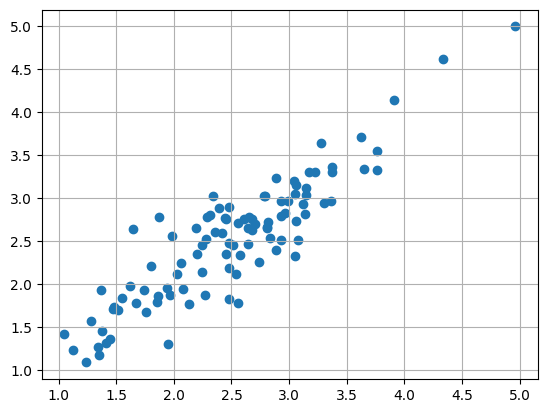

In [38]:
plt.scatter(y_test,prediccion_con_testing)
plt.grid()
plt.show()

10) Evaluar modelo

In [39]:
metrics.mean_absolute_error(y_test, prediccion_con_testing)

0.25489659636959405

In [41]:
# Guardar modelo

import joblib
joblib.dump(modelo, "Modelo_Machine_Learning1.pkl")

['Modelo_Machine_Learning1.pkl']